**Delgado Gaona, Greisy Jhoana**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
import tensorflow as tf
from keras.utils import to_categorical
import keras

In [4]:
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
imgpath = "/content/drive/MyDrive/sportimages"

In [5]:
images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

<>:11: SyntaxWarning: invalid escape sequence '\.'
<>:11: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-2511738724.py:11: SyntaxWarning: invalid escape sequence '\.'
  if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):


leyendo imagenes de  /content/drive/MyDrive/sportimages
/content/drive/MyDrive/sportimages/basket 1
/content/drive/MyDrive/sportimages/americano 9
Directorios leidos: 2
Imagenes en cada directorio [10, 14]
suma Total de imagenes en subdirs: 24


In [6]:
labels=[]
indice=0
for cantidad in dircount:
  for i in range(cantidad):
      labels.append(indice)
  indice=indice +1
print("cantidad etiquetas creadas: ", len(labels))

cantidad etiquetas creadas:  24


In [7]:
deportes=[ ]
indice=0
for directorio in directories:
  name= directorio.split(os.sep)
  print(indice, name[len(name)-1])
  deportes.append(name[len(name)-1])
  indice=indice+1

0 basket
1 americano


In [8]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



In [9]:
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  2
Output classes :  [0 1]


In [10]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.25)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (18, 128, 128, 3) (18,)
Testing data shape :  (6, 128, 128, 3) (6,)


In [11]:
plt.figure(figsize=[5,5])

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

Text(0.5, 1.0, 'Ground Truth : 1')

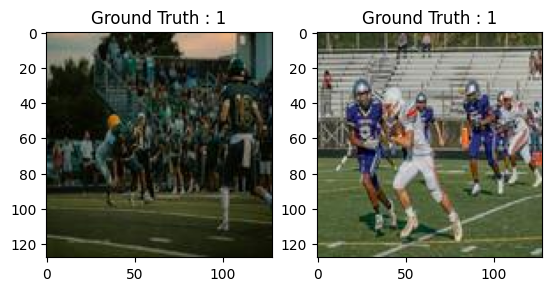

In [12]:
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, LeakyReLU

In [14]:
train_X_ = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 127.
test_X = test_X / 127.

In [15]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)


In [16]:
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 1
After conversion to one-hot: [0. 1.]


In [17]:
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)


In [18]:
INIT_LR = 1e-4 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 6 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 4 # cantidad de imágenes que se toman a la vez en memoria


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, LeakyReLU

sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', padding='same', input_shape=(128,128,3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2), padding='same'))
sport_model.add(Dropout(0.5))

sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(2, activation='softmax'))

sport_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     4,194,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,195,298 (16.00 MB)

 Trainable params: 4,195,298 (16.00 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [21]:
sport_model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adagrad(learning_rate=INIT_LR),
    metrics=['accuracy']
)

In [22]:
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(valid_X, valid_label))

Epoch 1/6
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.3798 - loss: 0.8556 - val_accuracy: 0.2500 - val_loss: 0.7442
Epoch 2/6
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.5512 - loss: 0.8036 - val_accuracy: 0.2500 - val_loss: 0.7845
Epoch 3/6
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.6619 - loss: 0.5768 - val_accuracy: 0.7500 - val_loss: 0.6541
Epoch 4/6
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.4083 - loss: 0.7899 - val_accuracy: 0.2500 - val_loss: 0.7401
Epoch 5/6
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.7643 - loss: 0.5057 - val_accuracy: 0.7500 - val_loss: 0.6541
Epoch 6/6
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.6738 - loss: 0.6332 - val_accuracy: 0.7500 - val_loss: 0.6722


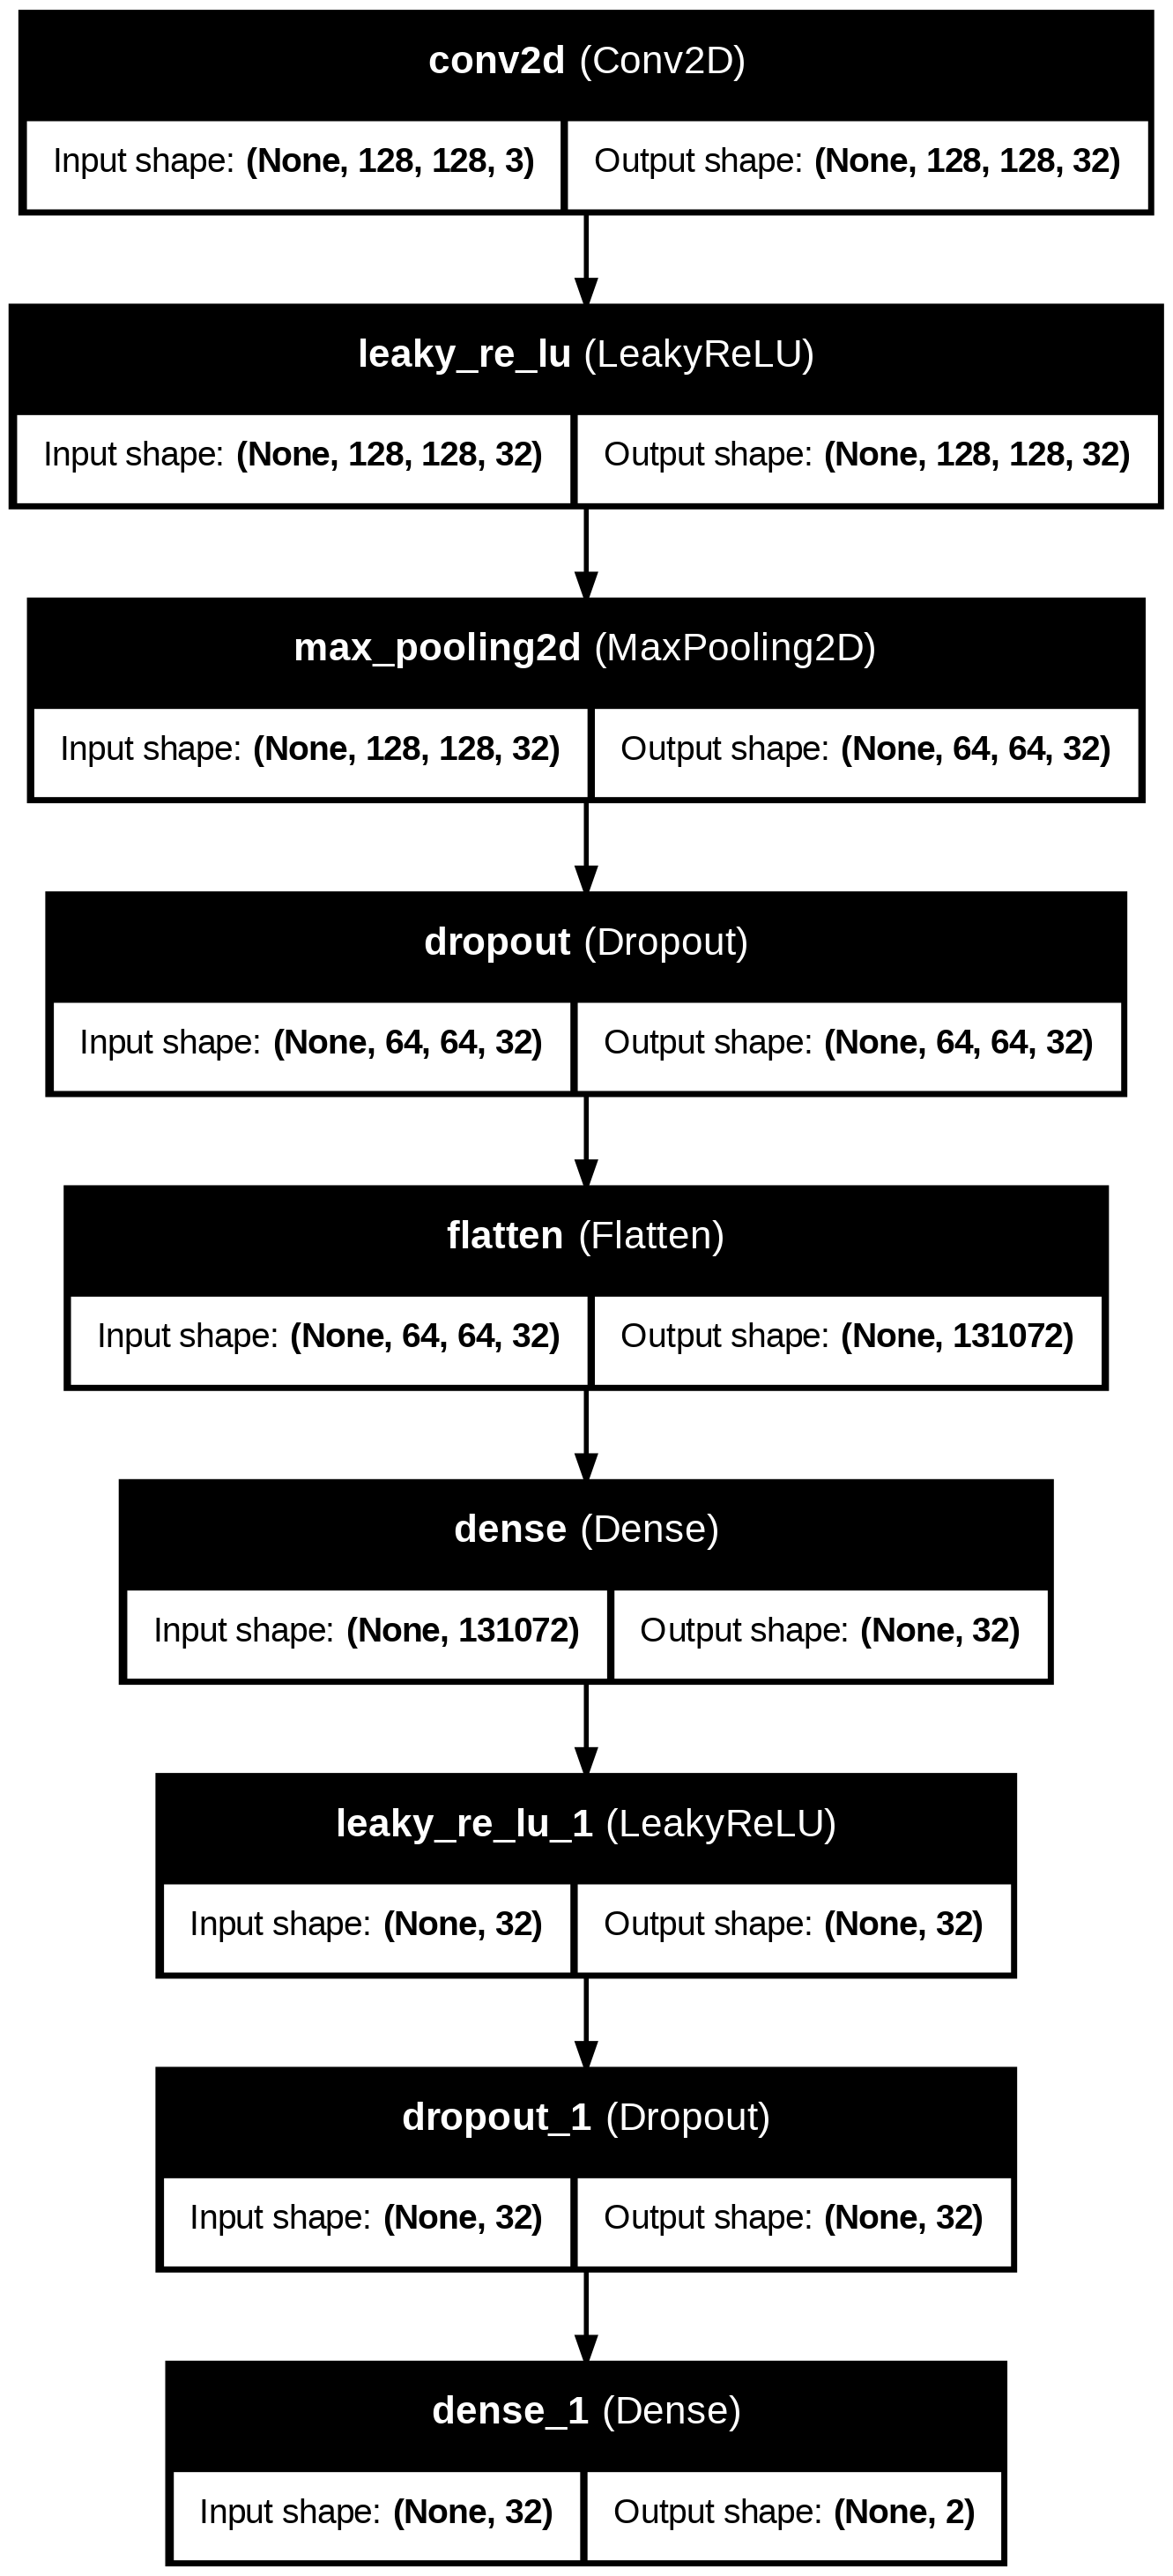

In [23]:
 from tensorflow.keras.utils import plot_model
 plot_model(sport_model, to_file='model.png', show_shapes=True, show_layer_names=True)


In [24]:
x=np.array(images, dtype=np.float32)
y=np.array(labels)
classes=np.unique(y)
num_classes=len(classes)
print('Total de clases: ', num_classes)

Total de clases:  2


In [25]:
test_eval=sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - accuracy: 0.5000 - loss: 0.6822


In [26]:
predicted_classes2 = sport_model.predict(test_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


In [27]:
predicted_classes = []
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))

predicted_classes = np.array(predicted_classes)


In [28]:
predicted_classes.shape, test_Y.shape

((6,), (6,))

Found 3 correct labels


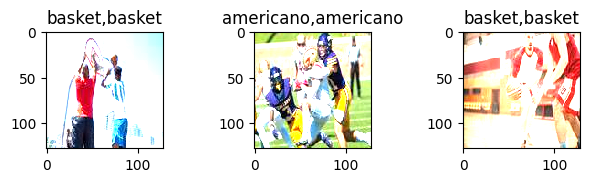

In [29]:
correct=np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(128,128,3), cmap='gray', interpolation='none')
    plt.title( "{},{}".format( deportes[predicted_classes[correct]],deportes[test_Y[correct]]))
    plt.tight_layout()


Found 3 correct labels


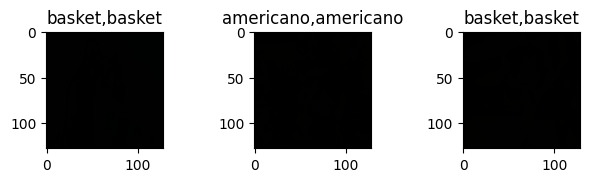

In [30]:
correct=np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, c in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[c].astype(np.uint8))
    plt.title( "{},{}".format(deportes[predicted_classes[c]],deportes[test_Y[c]]))
    plt.tight_layout()

Found 3 incorrect labels


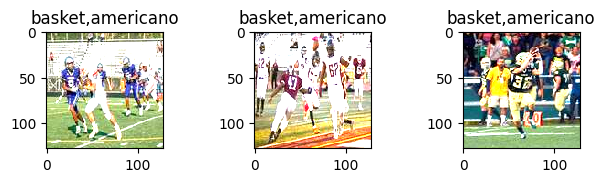

In [31]:
incorrect=np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))

for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(128,128,3), cmap='gray', interpolation='none')
    plt.title( "{},{}".format(deportes[predicted_classes[incorrect]],deportes[test_Y[incorrect]]))
    plt.tight_layout()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


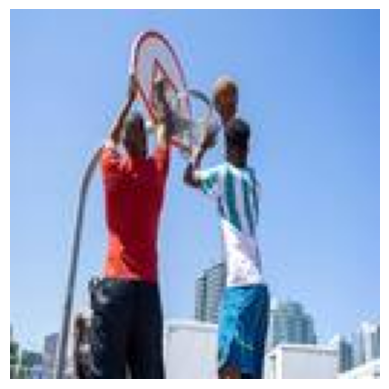

Predicción: basket


In [46]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize

import os

nombre_archivo = "/content/drive/MyDrive/sportimages/basket/pexels-pnw-prod-8979900.jpg"


# Cargar imagen
image = plt.imread(nombre_archivo)

# Preprocesar imagen (ajústalo según cómo entrenaste tu modelo)
image_resized = resize(image, (128, 128, 3), anti_aliasing=True)
image_resized = image_resized.astype('float32') / 255.0
image_input = np.expand_dims(image_resized, axis=0)

# Predicción
prediction = sport_model.predict(image_input)
predicted_class = np.argmax(prediction, axis=1)[0]

# Clases
class_names = ["basket", "americano"]
predicted_label = class_names[predicted_class]

# Mostrar imagen
plt.imshow(image)
plt.axis('off')
plt.show()

print("Predicción:", predicted_label)
